# Поиск конкурентов

In [22]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import pandas as pd
from pandas.io.json import json_normalize
import requests
from shapely.geometry import Polygon, Point

In [23]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 100)

In [24]:
endpoint = 'https://overpass.kumi.systems/api/interpreter'
overpass_query = """
[out:json][timeout:25];
(
  node['shop'='hairdresser'](43.077634635447616,131.82769775390622,43.182148446530114,132.02030181884763);
);
out body;
"""
result = requests.get(url=endpoint, params={'data': overpass_query})
result

<Response [200]>

In [25]:
data = result.json()

In [26]:
barbers = json_normalize(data=data['elements'])

In [27]:
geom = [Point(cord['lat'], cord['lon']) for cord in data['elements']]
barbers_gdf = gpd.GeoDataFrame(data = barbers, geometry=geom)
barbers_gdf[~barbers_gdf['tags.name'].isnull()].tail()

,type,id,lat,lon,tags.name,tags.name:en,tags.opening_hours,tags.shop,tags.name:ru,tags.source,tags.phone,tags.description,tags.contact:phone,tags.comment,geometry
82,node,4406230098,43.116140,131.887465,Добро,NaN,NaN,hairdresser,NaN,knowledge,NaN,NaN,NaN,NaN,POINT (43.116 131.887)
84,node,4842791021,43.107102,131.954743,Белая ночь,WhiteNight,NaN,hairdresser,NaN,NaN,NaN,NaN,NaN,NaN,POINT (43.107 131.955)
85,node,4852879767,43.125020,131.945844,Александрия,NaN,Mo-Sa 09:00-19:00,hairdresser,NaN,image,NaN,NaN,NaN,NaN,POINT (43.125 131.946)
87,node,5808092953,43.100587,131.931234,Богема,NaN,Mo-Su 09:00-18:00,hairdresser,NaN,NaN,NaN,NaN,NaN,NaN,POINT (43.101 131.931)
88,node,5840733585,43.125196,131.916551,Вирджиния,NaN,Mo-Su 10:00-20:00,hairdresser,NaN,NaN,NaN,NaN,NaN,NaN,POINT (43.125 131.917)


In [28]:
# barbers_gdf.to_csv('data/barbers.csv')

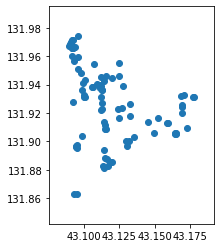

In [14]:
barbers_gdf.plot()

In [17]:
m = folium.Map(location=[43.110745, 131.926339],
                zoom_start=13, weight=1000, height=500,
                tiles='cartodbpositron')

for lat, lon in zip(barbers_gdf['lat'], barbers_gdf['lon']):
    folium.Marker(location=[lat, lon]).add_to(m)

m

In [18]:
heat_data = [(cord['lat'], cord['lon']) for cord in data['elements']]

m = folium.Map(location=[43.110745, 131.926339],
                zoom_start=13, weight=1000, height=500,
                tiles='cartodbpositron')

for lat, lon in zip(barbers_gdf['lat'], barbers_gdf['lon']):
    HeatMap(data=heat_data, radius=10, max_zoom=18, min_opacity=0.5, blur=10).add_to(m)

m